
***Basic SVM accuracy wihtout without PCA***

In [2]:
import os
import pickle
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

folder_path = "./data/"

def load_data(folder_path):
    X = []  
    y = []  
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if file_path.endswith('.pk'):
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
                X.append(data['embed'])  
                y.append(data['gender'])  
    return np.array(X), np.array(y)

X_male, y_male = load_data(folder_path + 'male')
X_female, y_female = load_data(folder_path + 'female')

X = np.vstack((X_male, X_female))
y = np.concatenate((y_male, y_female))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

clf = svm.SVC()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9989743589743589


***Basic SVM visualization (color per speaker) with PCA***

/var/folders/h0/lnbg3q_57cz78qcx549z2c940000gn/T/ipykernel_12498/3592386214.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_ids))  # Using a color map that can provide enough unique colors


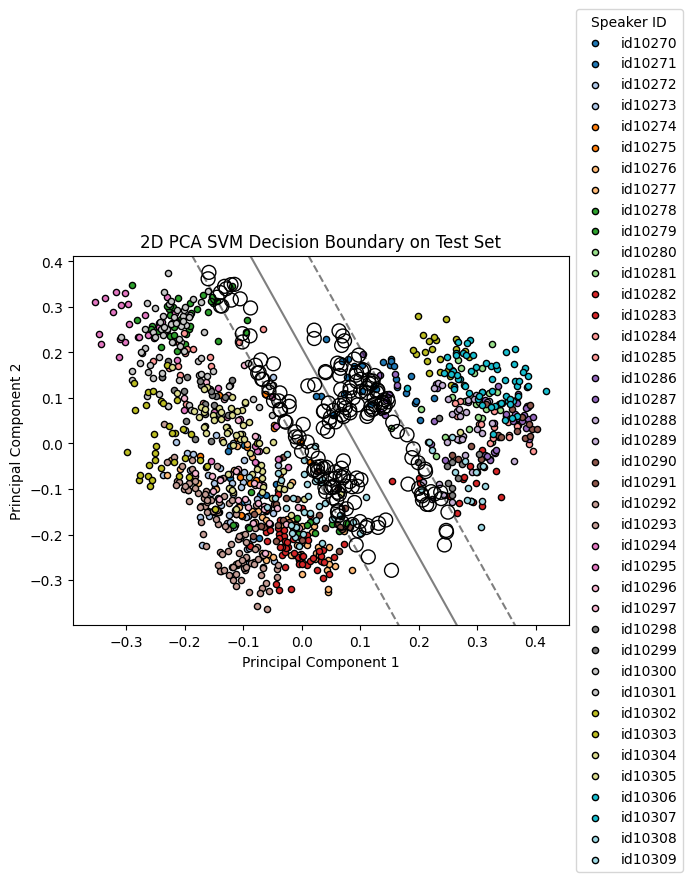

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


folder_path = "./data/"

def load_data(folder_path):
    X = []  
    y = []  
    ids = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if file_path.endswith('.pk'):
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
                X.append(data['embed'])  
                y.append(data['gender'])  
                ids.append(data['id'])
    return np.array(X), np.array(y), np.array(ids)

X_male, y_male, ids_male = load_data(folder_path+'male')
X_female, y_female, ids_female = load_data(folder_path+'female')

X = np.vstack((X_male, X_female))
y = np.concatenate((y_male, y_female))
ids = np.concatenate((ids_male, ids_female), axis=0)

# Create a unique color for each speaker
unique_ids = np.unique(ids)
colors = plt.cm.get_cmap('tab20', len(unique_ids))  # Using a color map that can provide enough unique colors
id_to_color = {id_: colors(i) for i, id_ in enumerate(unique_ids)}

# Encode gender labels numerically ('m' -> 0, 'f' -> 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Reduce dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the reduced data
X_train_pca, X_test_pca, y_train_encoded, y_test_encoded, ids_train, ids_test = train_test_split(
    X_pca, y_encoded, ids, test_size=0.2, random_state=42, shuffle=True)

# Train SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train_pca, y_train_encoded)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, ids, plot_support=True):
    """Plot the decision boundary of an SVM on the test set, colored by speaker ID."""
    # Plot data points, colored by speaker ID
    for id_ in unique_ids:
        idx = ids == id_
        plt.scatter(X[idx, 0], X[idx, 1], c=np.array([id_to_color[id_]]), label=id_, s=20, edgecolors='k')
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D PCA SVM Decision Boundary on Test Set')
    plt.legend(title='Speaker ID', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Plot the decision boundary using the test set
plot_decision_boundary(clf, X_test_pca, y_test_encoded, ids_test)


***Basic SVM accuracy (color per gender) without PCA***

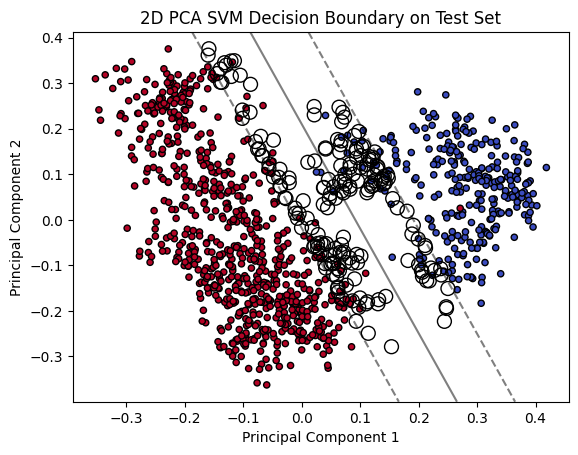

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming X and y are already defined and loaded as before

# Encode gender labels numerically ('m' -> 0, 'f' -> 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Reduce dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the reduced data
X_train_pca, X_test_pca, y_train_encoded, y_test_encoded = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42, shuffle=True)

# Train SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train_pca, y_train_encoded)

# Function to plot decision boundary

def plot_decision_boundary(clf, X, y, plot_support=True):
    """Plot the decision boundary of an SVM on the test set."""
    # Set up color map: 0 -> blue, 1 -> red
    cmap = plt.cm.coolwarm

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=20, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D PCA SVM Decision Boundary on Test Set')
    plt.show()

# Plot the decision boundary using the test set
plot_decision_boundary(clf, X_test_pca, y_test_encoded)


***Basic SVM accuracy (color per speaker) with PCA with w vector***

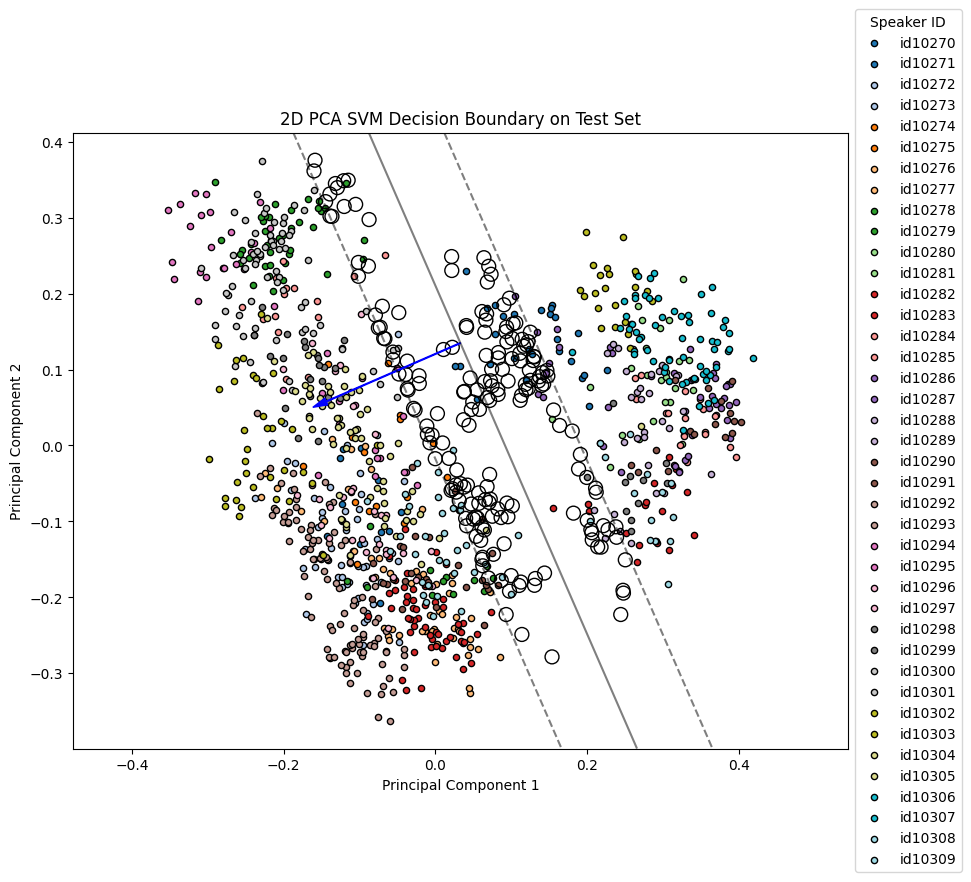

In [49]:
def plot_decision_boundary(clf, X, y, ids, plot_support=True):
    plt.figure(figsize=(10, 8))
    ax = plt.gca()
    for id_ in unique_ids:
        idx = ids == id_
        plt.scatter(X[idx, 0], X[idx, 1], c=np.array([id_to_color[id_]]), label=id_, s=20, edgecolors='k')

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Equal scaling of plot axes to ensure perpendicularity is visually accurate
    plt.axis('equal')

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

    # Extract and scale vector w for plotting
    w = clf.coef_[0]
    norm_w = np.linalg.norm(w)
    scale_factor = 0.25 * max(np.ptp(X[:, 0]), np.ptp(X[:, 1]))
    w_dir = w / norm_w * scale_factor

    # Calculate intercept point for decision boundary line
    mid_x = np.mean([xlim[0], xlim[1]])
    mid_y = -1 * (clf.coef_[0][0] * mid_x + clf.intercept_[0]) / clf.coef_[0][1]
    plt.arrow(mid_x, mid_y, w_dir[0], w_dir[1], head_width=0.05 * scale_factor, head_length=0.1 * scale_factor, fc='b', ec='b')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D PCA SVM Decision Boundary on Test Set')
    plt.legend(title='Speaker ID', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Plot the decision boundary using the test set
plot_decision_boundary(clf, X_test_pca, y_test_encoded, ids_test)


***SVM accuracy (color per nationality) without PCA***

In [37]:
import os
import pickle
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def load_data(folder_path):
    X = []  # Embeddings
    y = []  # Nationalities
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if file_path.endswith('.pk'):
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
                X.append(data['embed'])
                y.append(data['nationality'])  # Change from gender to nationality
    return np.array(X), np.array(y)

# Load data from both folders
X_male, y_male = load_data(folder_path+'male')
X_female, y_female = load_data(folder_path+'female')

# Combine the data
X = np.vstack((X_male, X_female))
y = np.concatenate((y_male, y_female))

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train an SVM classifier for multiclass classification
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')  # 'ovr' for one-vs-rest
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99


***SVM rbf kernel visualization (color per nationality, female only) with LDA***

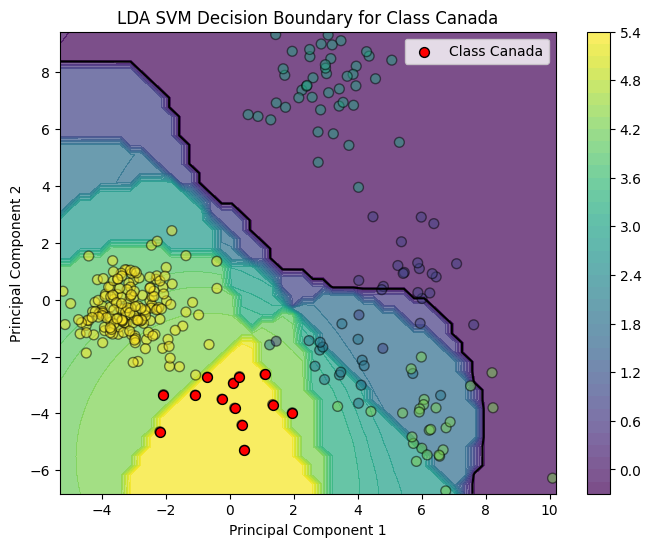

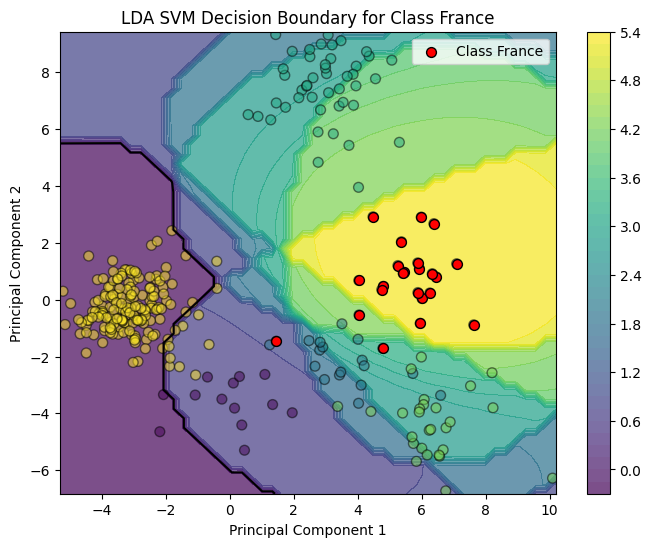

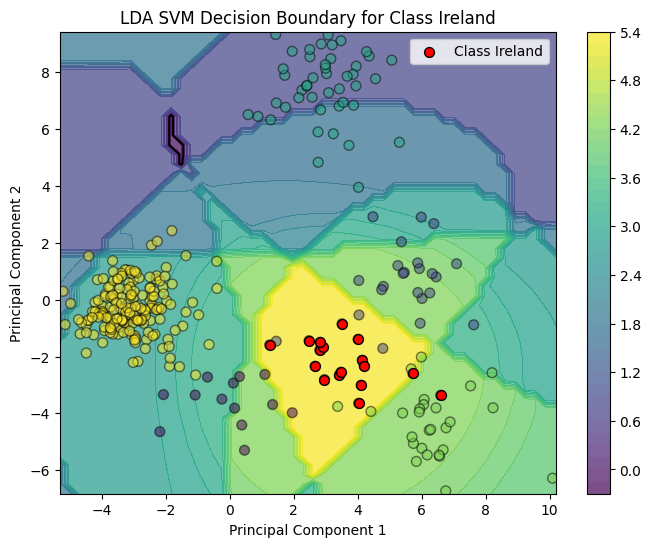

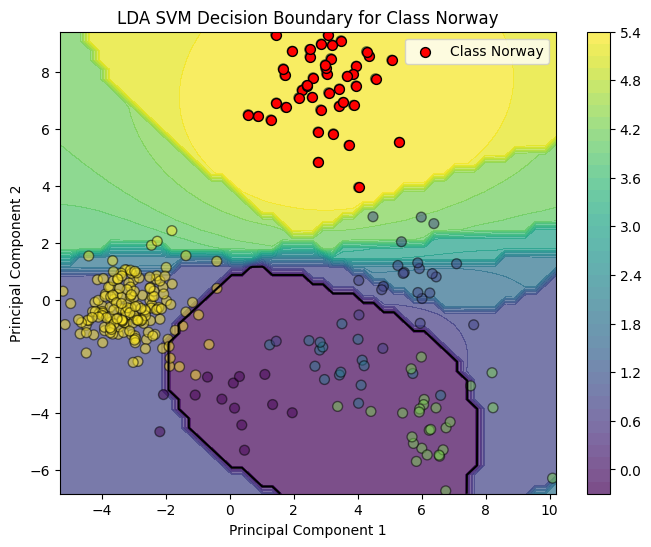

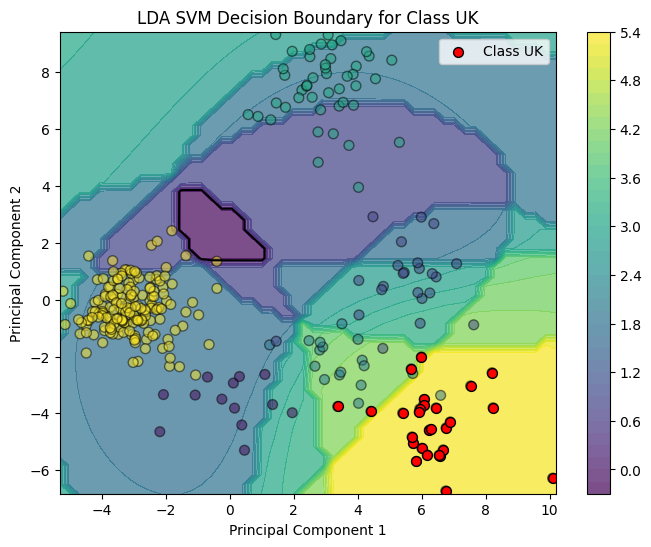

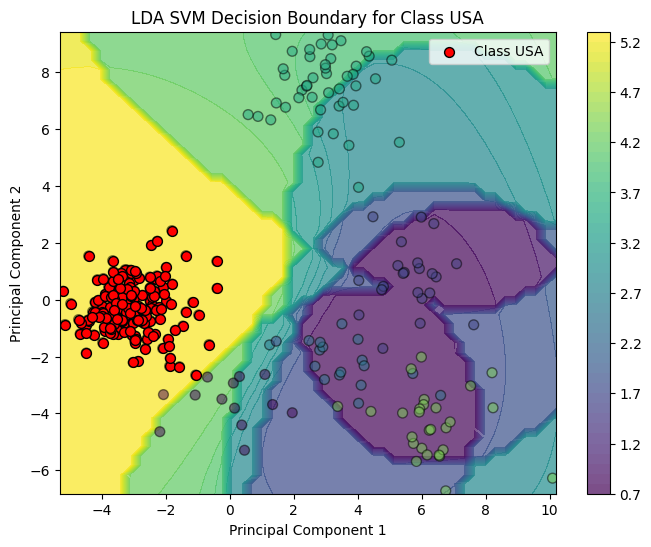

In [28]:
import os
import pickle
import numpy as np
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def load_data(folder_path):
    X = []  # Embeddings
    y = []  # Nationalities
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if file_path.endswith('.pk'):
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
                X.append(data['embed'])
                y.append(data['nationality'])
    return np.array(X), np.array(y)

# Load data from the 'female' folder
X_female, y_female = load_data(folder_path+'female')

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_female)

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_female, y_encoded)

# Split the data into training and testing sets
X_train_lda, X_test_lda, y_train_encoded, y_test_encoded = train_test_split(X_lda, y_encoded, test_size=0.2, random_state=42, shuffle=True)

def plot_decision_boundaries(clf, X, y, title_prefix="LDA SVM Decision Boundary"):
    cmap = plt.get_cmap('viridis')
    classes = clf.classes_

    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = clf.decision_function(xy)

    for i, class_label in enumerate(classes):
        plt.figure(figsize=(8, 6))
        Z_class = Z[:, i].reshape(xx.shape)
        plt.contourf(xx, yy, Z_class, levels=50, cmap=cmap, alpha=0.7)
        plt.colorbar()
        plt.contour(xx, yy, Z_class, levels=[0], linestyles=['-'], colors='k')

        # Plot data points with highlighting for points of the current class
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=50, alpha=0.5)
        highlights = np.where(y == class_label)
        plt.scatter(X[highlights, 0], X[highlights, 1], c='red', edgecolor='k', s=50, label=f'Class {label_encoder.inverse_transform([class_label])[0]}', alpha=1)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'{title_prefix} for Class {label_encoder.inverse_transform([class_label])[0]}')
        plt.legend()
        plt.show()

# Train a non-linear SVM with RBF kernel
clf_rbf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
clf_rbf.fit(X_train_lda, y_train_encoded)

# Plot the decision boundaries using the test set
plot_decision_boundaries(clf_rbf, X_test_lda, y_test_encoded)


***SVM rbf kernel visualization (color per nationality, female and male) with LDA***

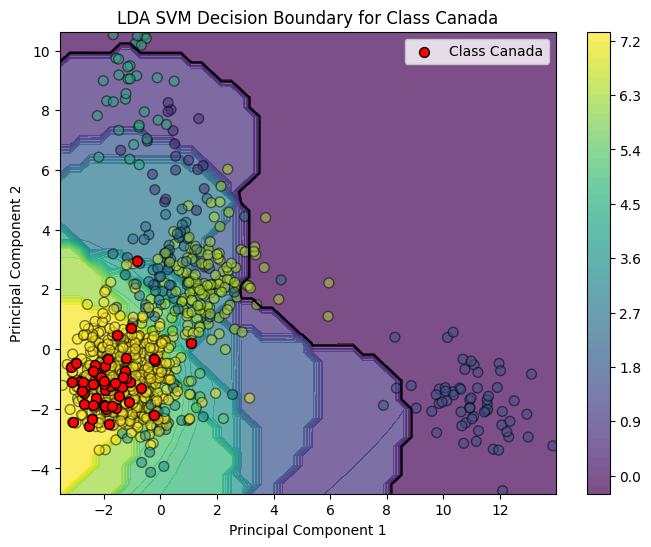

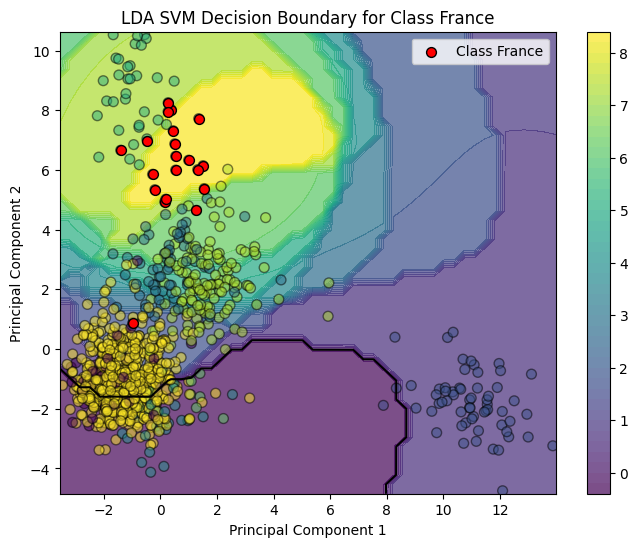

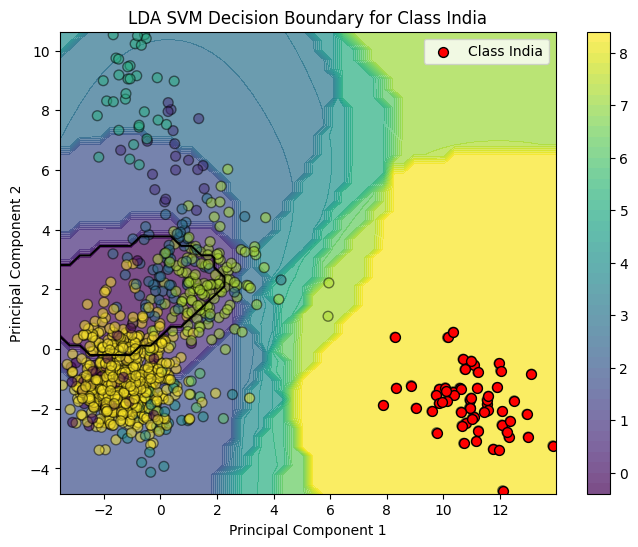

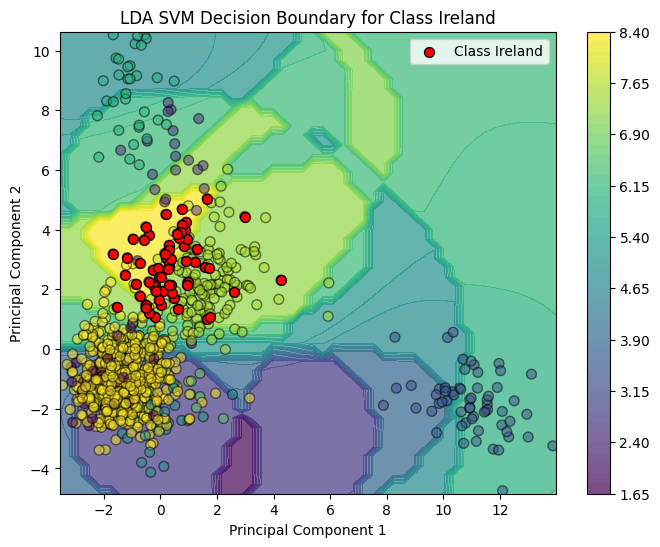

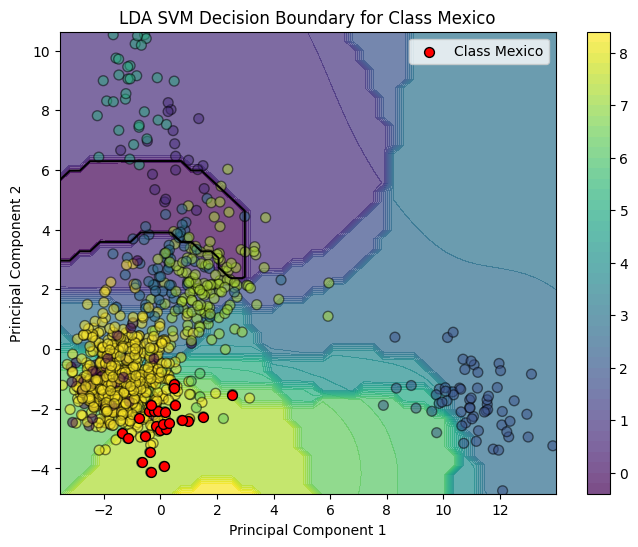

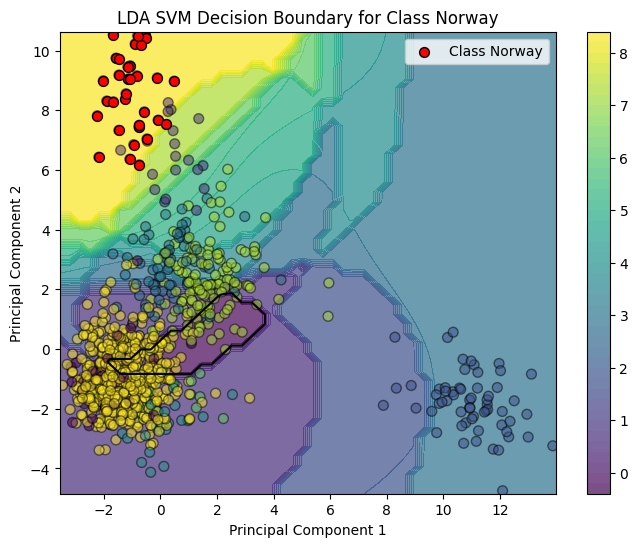

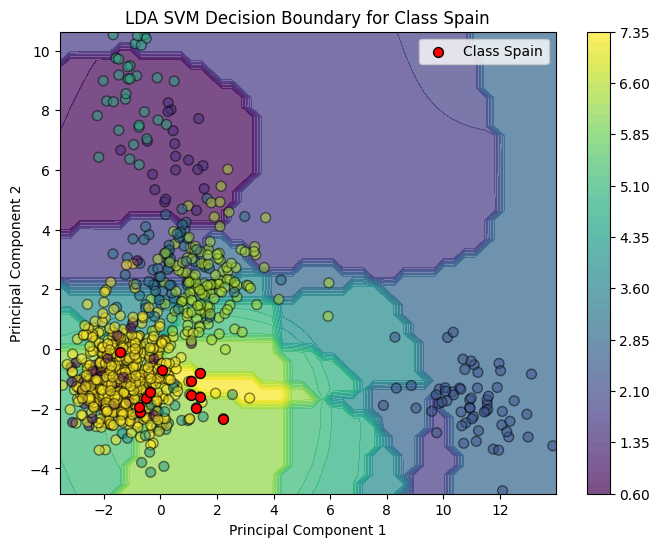

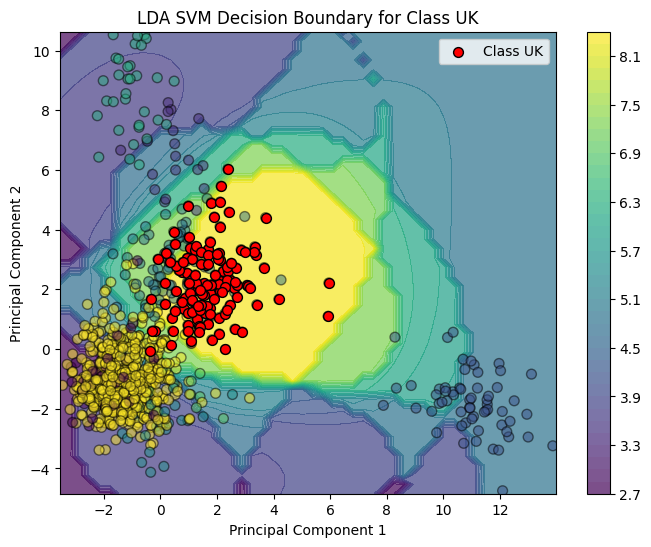

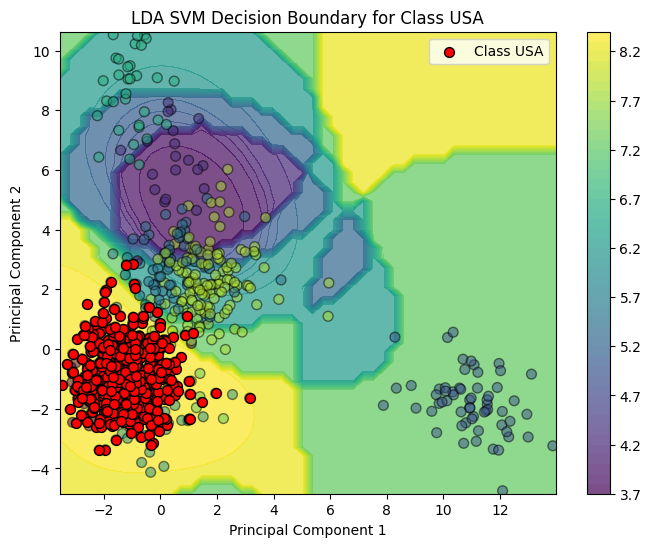

In [3]:
import os
import pickle
import numpy as np
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def load_data(folder_path):
    X = []  # Embeddings
    y = []  # Nationalities
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if file_path.endswith('.pk'):
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
                X.append(data['embed'])
                y.append(data['nationality'])
    return np.array(X), np.array(y)

# Assuming 'folder_path' is defined and points to the parent directory of 'male' and 'female' folders
X_male, y_male = load_data(folder_path + 'male')
X_female, y_female = load_data(folder_path + 'female')

# Combine male and female data
X_combined = np.vstack((X_male, X_female))
y_combined = np.concatenate((y_male, y_female))

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_combined)

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_combined, y_encoded)

# Split the data into training and testing sets
X_train_lda, X_test_lda, y_train_encoded, y_test_encoded = train_test_split(
    X_lda, y_encoded, test_size=0.2, random_state=42, shuffle=True)

def plot_decision_boundaries(clf, X, y, title_prefix="LDA SVM Decision Boundary"):
    cmap = plt.get_cmap('viridis')
    classes = clf.classes_

    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = clf.decision_function(xy)

    for i, class_label in enumerate(classes):
        plt.figure(figsize=(8, 6))
        Z_class = Z[:, i].reshape(xx.shape)
        plt.contourf(xx, yy, Z_class, levels=50, cmap=cmap, alpha=0.7)
        plt.colorbar()
        plt.contour(xx, yy, Z_class, levels=[0], linestyles=['-'], colors='k')

        # Plot data points with highlighting for points of the current class
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=50, alpha=0.5)
        highlights = np.where(y == class_label)
        plt.scatter(X[highlights, 0], X[highlights, 1], c='red', edgecolor='k', s=50, label=f'Class {label_encoder.inverse_transform([class_label])[0]}', alpha=1)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'{title_prefix} for Class {label_encoder.inverse_transform([class_label])[0]}')
        plt.legend()
        plt.show()

# Train a non-linear SVM with RBF kernel
clf_rbf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
clf_rbf.fit(X_train_lda, y_train_encoded)

# Plot the decision boundaries using the test set
plot_decision_boundaries(clf_rbf, X_test_lda, y_test_encoded)
